# UAS

200411100171 Ahmad Farisul Haq \\
200411100201 Arifatul Maghfiroh

## Naive Bayes

## Persiapan Dataset

### Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import joblib

### Fungsi timestamp

In [ ]:
def df_to_X_y(df, window_size=2):
  X, y = [], []
#   df_np = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size], df[i+window_size]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

### Read data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/farisulhaq/dataset/main/isat-jk.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/15/2020,2280,2450,2250,2250,1887.442749,46949400
1,6/16/2020,2350,2390,2300,2380,1996.494995,23314400
2,6/17/2020,2390,2420,2330,2350,1971.328979,12781300
3,6/18/2020,2300,2530,2290,2500,2097.158691,23787500
4,6/19/2020,2500,2550,2470,2530,2122.324463,10242400
...,...,...,...,...,...,...,...
725,6/7/2023,8475,8775,8250,8775,8775.000000,16717400
726,6/8/2023,8775,8850,8650,8700,8700.000000,9898700
727,6/9/2023,8700,8800,8575,8700,8700.000000,7169900
728,6/12/2023,8700,8950,8600,8650,8650.000000,6603600


### Jumlah data

In [ ]:
data.count()

Date         730
Open         730
High         730
Low          730
Close        730
Adj Close    730
Volume       730
dtype: int64

### Set index dates to data

In [ ]:
# data["Date"] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index("Date", inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
6/15/2020,2280,2450,2250,2250,1887.442749,46949400
6/16/2020,2350,2390,2300,2380,1996.494995,23314400
6/17/2020,2390,2420,2330,2350,1971.328979,12781300
6/18/2020,2300,2530,2290,2500,2097.158691,23787500
6/19/2020,2500,2550,2470,2530,2122.324463,10242400
...,...,...,...,...,...,...
6/7/2023,8475,8775,8250,8775,8775.000000,16717400
6/8/2023,8775,8850,8650,8700,8700.000000,9898700
6/9/2023,8700,8800,8575,8700,8700.000000,7169900


### Plot data

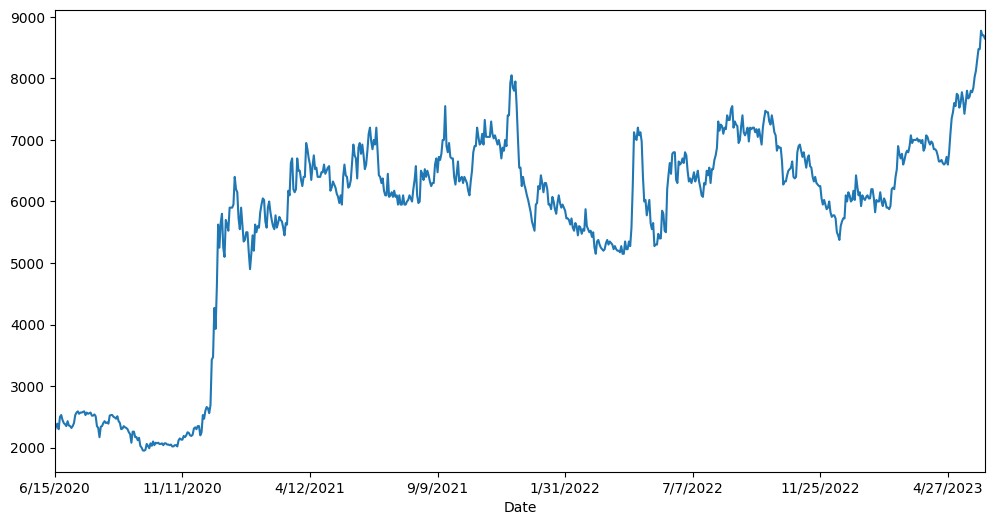

In [ ]:
data['Open'].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Prepocessing data

### Timestamp

In [ ]:
window_size = 4
X, y = df_to_X_y(data['Open'], window_size)

### Cek ukuran data dan target

In [ ]:
X.shape, y.shape

((726, 4), (726,))

### Normalisasi (MinMax)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.05057471, 0.05860806, 0.06446886, 0.05128205],
       [0.06130268, 0.06446886, 0.05128205, 0.08058608],
       [0.06743295, 0.05128205, 0.08058608, 0.08498168],
       ...,
       [0.97318008, 0.95604396, 0.95604396, 1.        ],
       [1.        , 0.95604396, 1.        , 0.98901099],
       [1.        , 1.        , 0.98901099, 0.98901099]])

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Reduksi Dimensi (PCA)

In [ ]:
pca = PCA(n_components=window_size-1)
pcaa = pca.fit_transform(scaled)

In [ ]:
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

### Split data training dan test (MinMax)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(scaled, y, test_size=0.2, random_state=0, shuffle=False)

### Split data training dan test (PCA)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pcaa, y, test_size=0.2, random_state=0, shuffle=False)

## Modelling

### Naive Bayes

#### MinMaxScaler

##### Training

In [ ]:
gNB = GaussianNB()
gNB.fit(X_train_minmax, y_train_minmax)

joblib.dump(gNB, 'gNB-minmax.pkl')

['gNB-minmax.pkl']

##### Test

In [ ]:
y_pred=gNB.predict(X_test_minmax)

##### Plot hasil prediksi dan data actual

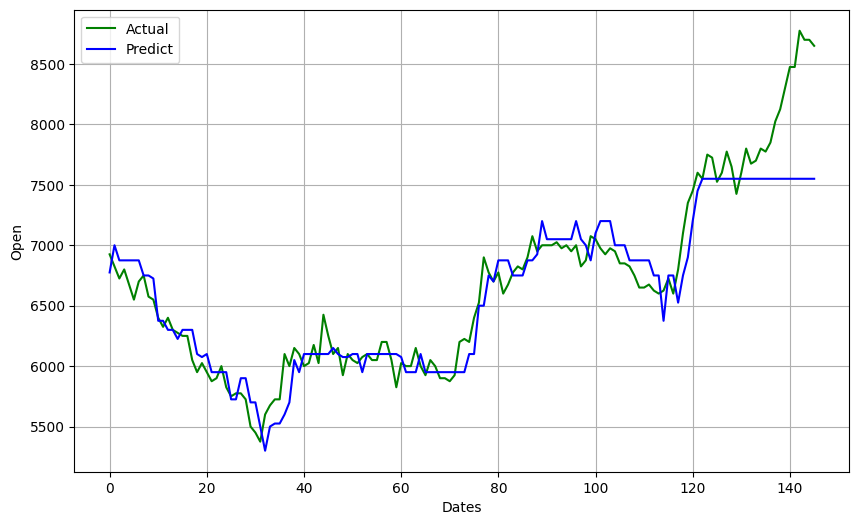

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_minmax, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_minmax, y_pred)}')

mape = 0.026004625509876544


#### PCA

##### Training

In [ ]:
gNB = GaussianNB()
gNB.fit(X_train_pca, y_train_pca)

joblib.dump(gNB, 'gNB-pca.pkl')

['gNB-pca.pkl']

##### Test

In [ ]:
y_pred=gNB.predict(X_test_pca)

##### Plot hasil prediksi dan data actual

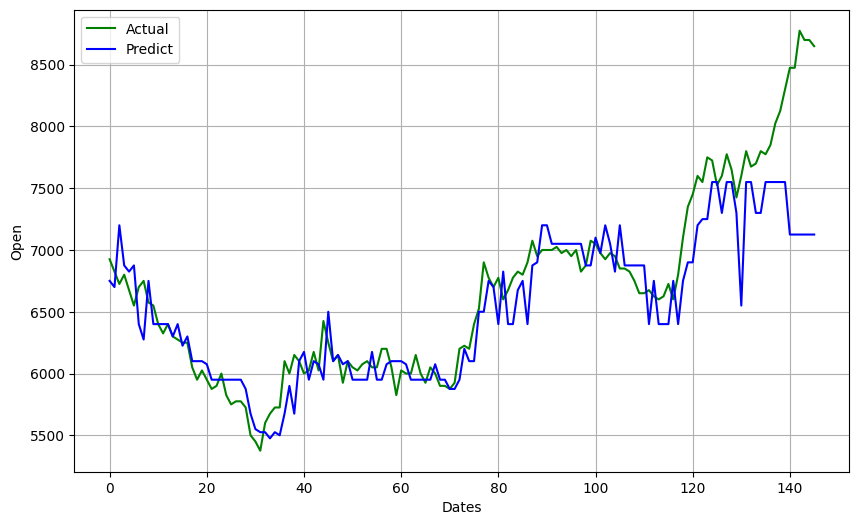

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_pca, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_pca, y_pred)}')

mape = 0.032975034504294204


### KNN

#### MinMaxScaler

##### Training

In [ ]:
model = KNeighborsRegressor()

parameters = {
    'n_neighbors': list(range(3,50,2))
}

search = GridSearchCV(model, parameters)
search.fit(X_train_minmax, y_train_minmax)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49]})

In [ ]:
search.best_params_

{'n_neighbors': 3}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_minmax, y_train_minmax)

joblib.dump(knn, 'knn-minmax.pkl')

['knn-minmax.pkl']

##### Test

In [ ]:
y_pred=knn.predict(X_test_minmax)

##### Plot hasil prediksi dan data actual

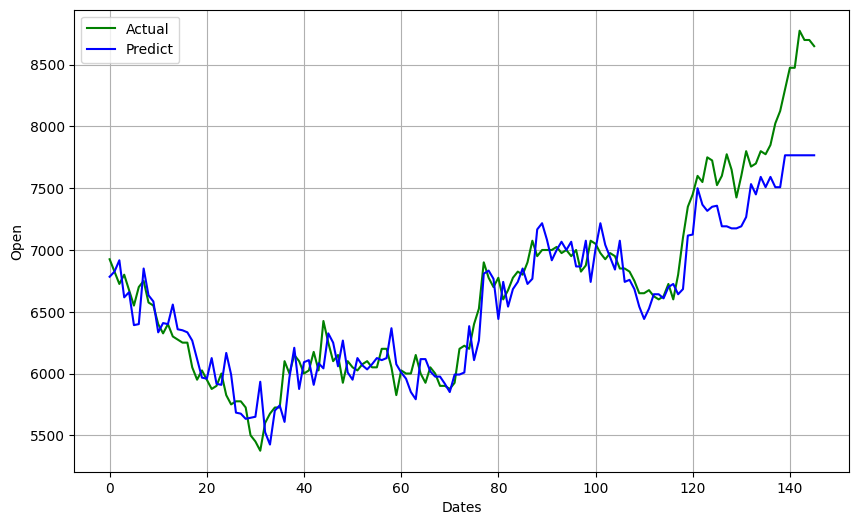

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_minmax, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_minmax, y_pred)}')

mape = 0.02782563225292304


#### PCA

##### Training

In [ ]:
model = KNeighborsRegressor()

parameters = {
    'n_neighbors': list(range(3,50,2))
}

search = GridSearchCV(model, parameters)
search.fit(X_train_pca, y_train_pca)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49]})

In [ ]:
search.best_params_

{'n_neighbors': 3}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_pca, y_train_pca)

joblib.dump(knn, 'knn-pca.pkl')

['knn-pca.pkl']

##### Test

In [ ]:
y_pred=knn.predict(X_test_pca)

##### Plot hasil prediksi dan data actual

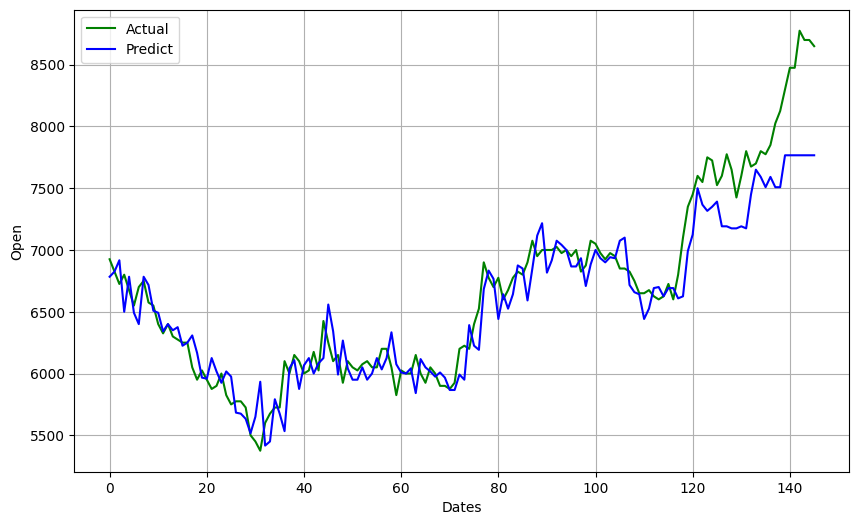

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_pca, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_pca, y_pred)}')

mape = 0.027762263054522996


### Decision Tree

#### MinMaxScaler

##### Training

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_minmax, y_train_minmax)

joblib.dump(regressor, 'dtr-minmax.pkl')

['dtr-minmax.pkl']

##### Test

In [ ]:
y_pred=regressor.predict(X_test_minmax)

##### Plot hasil prediksi dan data actual

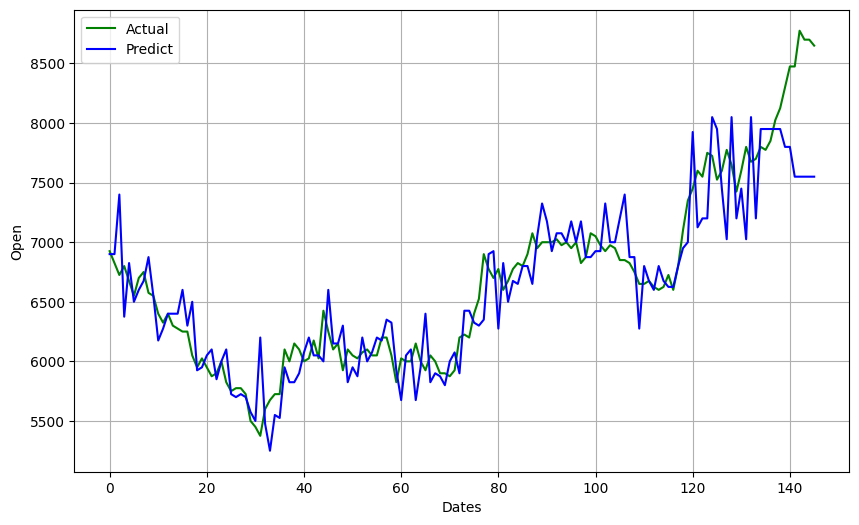

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_minmax, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_minmax, y_pred)}')

mape = 0.033408826510109305


#### PCA

##### Training

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_pca, y_train_pca)

joblib.dump(regressor, 'dtr-pca.pkl')

['dtr-pca.pkl']

##### Test

In [ ]:
y_pred=regressor.predict(X_test_pca)

##### Plot hasil prediksi dan data actual

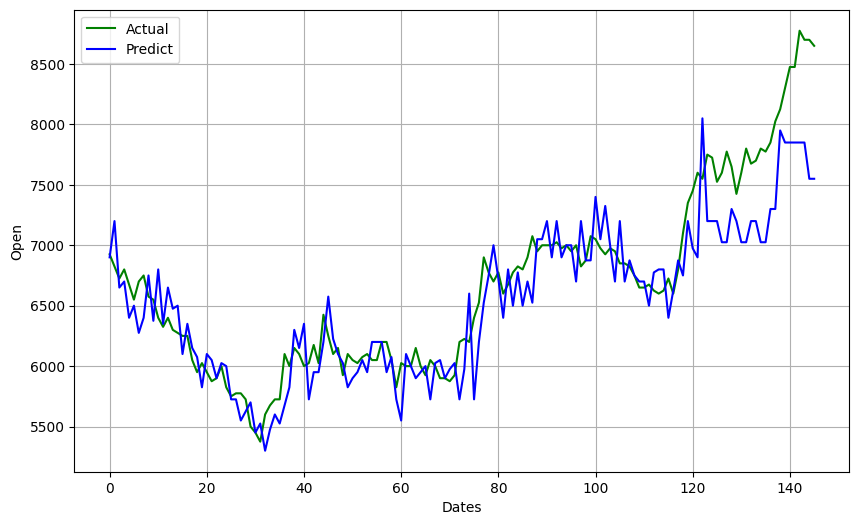

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_pca, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_pca, y_pred)}')

mape = 0.03618710276747776


### Linear Regression

#### MinMaxScaler

##### Training

In [ ]:
linear = LinearRegression()
linear.fit(X_train_minmax, y_train_minmax)

joblib.dump(linear, 'lr-minmax.pkl')

['lr-minmax.pkl']

##### Test

In [ ]:
y_pred=linear.predict(X_test_minmax)

##### Plot hasil prediksi dan data actual

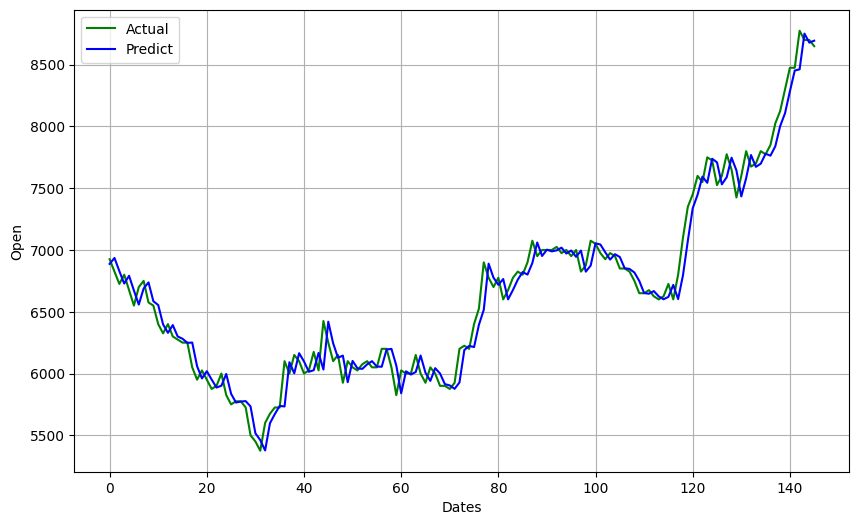

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_minmax, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_minmax, y_pred)}')

mape = 0.014939455541194744


#### PCA

##### Training

In [ ]:
linear = LinearRegression()
linear.fit(X_train_pca, y_train_pca)

joblib.dump(linear, 'lr-pca.pkl')

['lr-pca.pkl']

##### Test

In [ ]:
y_pred=linear.predict(X_test_pca)

##### Plot hasil prediksi dan data actual

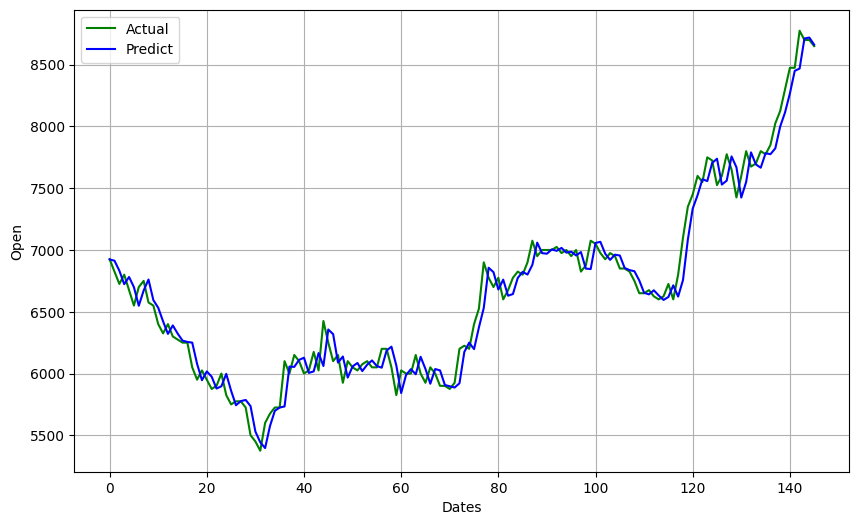

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_test_pca, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

##### Evalusi

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_test_pca, y_pred)}')

mape = 0.01536202392214381


In [ ]:
X_test_pca[0]

array([-0.27378275,  0.06415111,  0.00732918])